In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys

sys.path.append("../")

from vae_interp.vae import VAE
from vae_interp.sae import SAE
from vae_interp.controls import FeaturesControls
from vae_interp.dataset import load_nouns_dataset, NpyDataset
import matplotlib.pyplot as plt

In [32]:
vae = VAE.load_from_dir("../weights/vae")
sae = SAE.load_from_checkpoint("../checkpoints/sae_experiments_improved/lr=5.0e-05_l1=1.0e-03/config.json",
                               "../checkpoints/sae_experiments_improved/lr=5.0e-05_l1=1.0e-03/sae.pth")

In [33]:
nouns_dataset = load_nouns_dataset(image_size=64, normalize=True)

In [34]:
features_controls = FeaturesControls(
    sae=sae, vae=vae, latent_shape=(4, 4, 4)
)

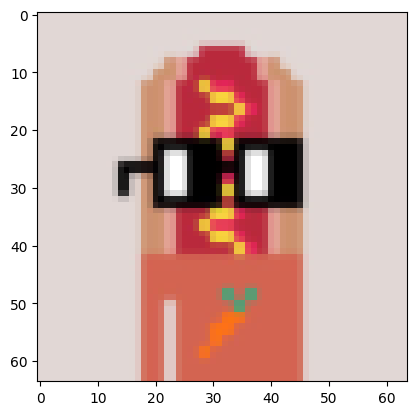

In [35]:
idx = 0
image = nouns_dataset[idx]

plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)

In [36]:
features = features_controls.get_features(image)
features

{0: 0.030860595405101776,
 29: 0.27606356143951416,
 38: 0.013518698513507843,
 90: 0.08412986993789673,
 134: 0.04000464081764221,
 142: 0.08012266457080841,
 154: 0.0962580144405365,
 162: 0.1623767912387848,
 166: 0.06026406213641167,
 183: 0.01351672038435936,
 232: 0.018642935901880264,
 238: 0.09169644117355347,
 248: 0.22201894223690033,
 279: 0.037018194794654846,
 281: 0.0037996359169483185,
 322: 0.06513938307762146,
 337: 0.040622223168611526,
 354: 0.05257062613964081,
 360: 0.050527576357126236,
 362: 0.17472141981124878,
 377: 0.015758290886878967,
 413: 0.10544498264789581,
 449: 0.0897175520658493,
 461: 0.044949330389499664,
 468: 0.9277112483978271,
 471: 0.13848750293254852,
 474: 0.09081653505563736,
 477: 0.053573913872241974,
 488: 0.05379073694348335,
 489: 0.326114296913147,
 495: 0.020997673273086548,
 498: 0.029601987451314926,
 513: 0.013688741251826286,
 519: 0.09286206215620041,
 528: 0.0555744394659996,
 553: 0.0037874802947044373,
 586: 1.1138015985488892

In [39]:
new_features = {**features}
# new_features[202] = 2
# new_features[1] = 3
# new_features[114] = 2
# new_features[497] = 2
# new_features[1] = 2.5
# new_features[197] = 0
new_features[1019] = 0
new_features

{0: 0.030860595405101776,
 29: 0.27606356143951416,
 38: 0.013518698513507843,
 90: 0.08412986993789673,
 134: 0.04000464081764221,
 142: 0.08012266457080841,
 154: 0.0962580144405365,
 162: 0.1623767912387848,
 166: 0.06026406213641167,
 183: 0.01351672038435936,
 232: 0.018642935901880264,
 238: 0.09169644117355347,
 248: 0.22201894223690033,
 279: 0.037018194794654846,
 281: 0.0037996359169483185,
 322: 0.06513938307762146,
 337: 0.040622223168611526,
 354: 0.05257062613964081,
 360: 0.050527576357126236,
 362: 0.17472141981124878,
 377: 0.015758290886878967,
 413: 0.10544498264789581,
 449: 0.0897175520658493,
 461: 0.044949330389499664,
 468: 0.9277112483978271,
 471: 0.13848750293254852,
 474: 0.09081653505563736,
 477: 0.053573913872241974,
 488: 0.05379073694348335,
 489: 0.326114296913147,
 495: 0.020997673273086548,
 498: 0.029601987451314926,
 513: 0.013688741251826286,
 519: 0.09286206215620041,
 528: 0.0555744394659996,
 553: 0.0037874802947044373,
 586: 1.1138015985488892

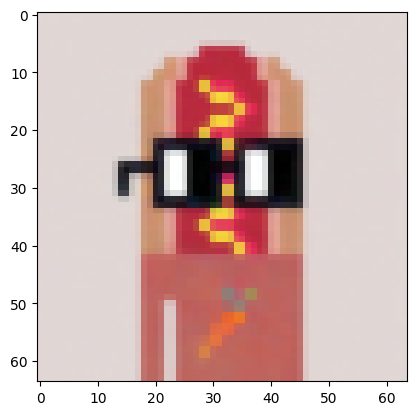

In [40]:
import torch
modified_image = features_controls.modify_features(image, new_features)
# modified_image = (modified_image - modified_image.min()) / (modified_image.max() - modified_image.min())
modified_image = torch.clamp((modified_image + 1) * 0.5, 0, 1)  
modified_image = modified_image.permute(1, 2, 0)

plt.imshow(modified_image)